FINAL PROJECT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

# Storing dataset in Pandas dataframe
df = pd.read_csv('mental_health_dataset.csv')

# Display the data
df.head()


,id,gender,age,major,gpa,class_status,marital_status,have_depression,have_anxiety,have_panicattacks,seeked_treatment
0,1,Female,19,Social Sciences,2.95,Sophomore,Yes,Yes,Yes,No,No
1,2,Male,18,Social Sciences,3.61,Sophomore,No,No,No,No,No
2,3,Male,20,Business,1.96,Junior,NaN,No,No,Yes,Yes
3,4,Agender,20,Communications,3.98,Freshman,No,Yes,Yes,No,No
4,5,Male,22,Business,2.53,Sophomore,No,No,No,Yes,No


MEAN

In [4]:
print("Mean of AGE", np.mean(df['age']))
print("Mean of GPA", np.mean(df['gpa']))

Mean of AGE 19.99656
Mean of GPA 2.904156799999987


MEDIAN

In [5]:
print("Median of AGE", np.median(df['age']))
print("Median of GPA", np.median(df['gpa']))

Median of AGE 20.0
Median of GPA 2.91


MODE

In [8]:
print("Mode of AGE",  stats.mode(df['age']))
print("Mode of GPA", stats.mode(df['gpa']))

Mode of AGE ModeResult(mode=array([18], dtype=int64), count=array([3609]))
Mode of GPA ModeResult(mode=array([3.88]), count=array([147]))


STANDARD DEVIATION

In [9]:
print("AGE STD", np.std(df['age']))
print("GPA STD", np.std(df['gpa']))

AGE STD 1.9986766037558397
GPA STD 0.635744446309813


VARIANCE

In [10]:
print("Variance of AGE", np.var(df['age']))
print("Variance of GPA", np.var(df['gpa']))

Variance of AGE 3.9947081664009776
Variance of GPA 0.40417100101377074


Describing the data statistically

In [2]:
df.describe()

,id,age,gpa
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,19.996560,2.904157
std,7217.022701,1.998717,0.635757
min,1.000000,17.000000,1.800000
25%,6250.750000,18.000000,2.360000
50%,12500.500000,20.000000,2.910000
75%,18750.250000,22.000000,3.460000
max,25000.000000,23.000000,4.000000


Remove any rows with NaN or NULL values

In [2]:
df.dropna(how='any', inplace=True)

,id,gender,age,major,gpa,class_status,marital_status,have_depression,have_anxiety,have_panicattacks,seeked_treatment
0,1,Female,19,Social Sciences,2.95,Sophomore,Yes,Yes,Yes,No,No
1,2,Male,18,Social Sciences,3.61,Sophomore,No,No,No,No,No
3,4,Agender,20,Communications,3.98,Freshman,No,Yes,Yes,No,No
4,5,Male,22,Business,2.53,Sophomore,No,No,No,Yes,No
5,6,Female,17,Communications,2.20,Freshman,No,Yes,No,No,No


DATA VISUALIZATION

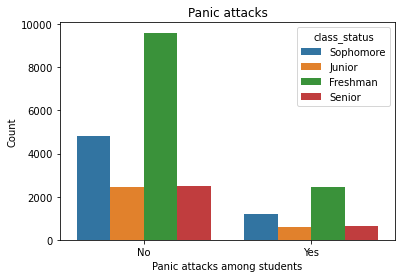

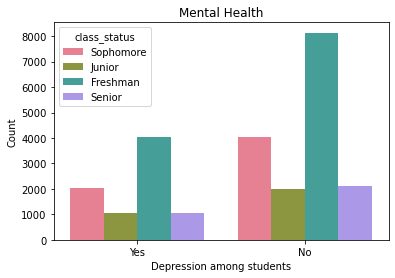

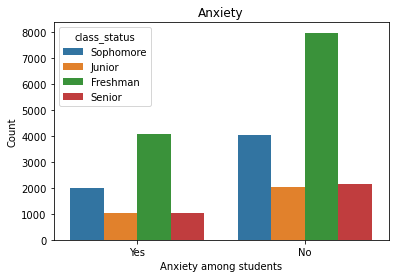

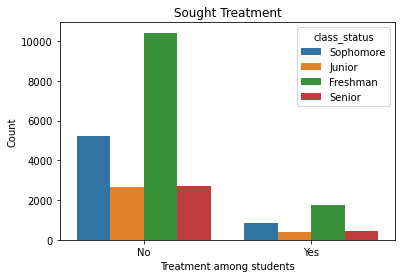

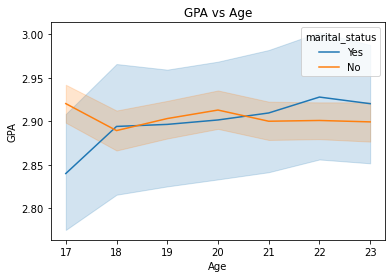

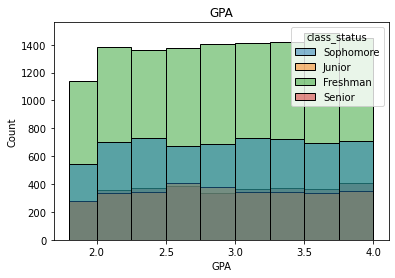

In [13]:
# # Data Visualization

# Panic attacks by class status 
plt.figure(1)
sns.countplot(data=df, x='have_panicattacks', hue='class_status', palette='tab10')
plt.title("Panic attacks")
plt.xlabel('Panic attacks among students')
plt.ylabel("Count")
plt.show()

# Mental health by class status
plt.figure(2)
sns.countplot(data=df, x='have_depression', hue='class_status', palette='husl')
plt.title("Mental Health")
plt.xlabel('Depression among students')
plt.ylabel("Count")
plt.show()

# Anxiety by class status
plt.figure(3)
sns.countplot(data=df, x='have_anxiety', hue='class_status', palette='tab10')
plt.title("Anxiety")
plt.xlabel('Anxiety among students')
plt.ylabel("Count")
plt.show()

# Sought treatment by class status
plt.figure(4)
sns.countplot(data=df, x='seeked_treatment', hue='class_status', palette='tab10')
plt.title("Sought Treatment")
plt.xlabel('Treatment among students')
plt.ylabel("Count")
plt.show()

# GPA By Age, Hue 'Marital Status'
plt.figure(5)
sns.lineplot(data=df, x='age', y='gpa', hue='marital_status', palette='tab10')
plt.title("GPA vs Age")
plt.xlabel('Age')
plt.ylabel("GPA")
plt.show()

# Histogram
plt.figure(6)
sns.histplot(data=df, x='gpa', bins = [1.8, 2.0, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4], hue='class_status', palette='tab10')
plt.title("GPA")
plt.xlabel('GPA')
plt.ylabel("Count")
plt.show()




Text(0.5, 1.0, 'Major Taken')

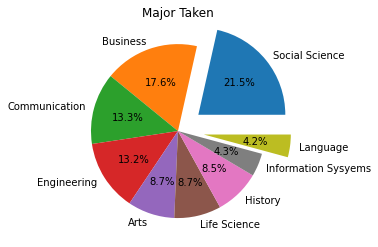

In [13]:
##Pie chart of major
labels = ["Social Science","Business",
          "Communication", "Engineering",
          "Arts", "Life Science", "History",
          "Information Sysyems", "Language"]
plt.pie(df['major'].value_counts(), labels=labels, autopct='%1.1f%%',
        explode=(0.3,0,0,0,0,0,0,0,0.3))
plt.title("Major Taken")

Text(0.5, 1.0, 'Class Status')

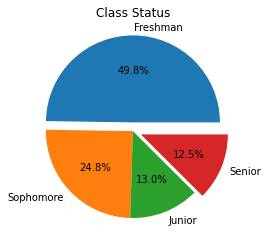

In [10]:
##Pie chart of Class Status
labels = ["Freshman", "Sophomore", 
          "Junior", "Senior"]
plt.pie(df['class_status'].value_counts(), labels=labels,
        autopct='%1.1f%%',explode=(0.1,0,0,0.1))
plt.title("Class Status")

Ordinalize any categorical data into numerical data (map categorical values to integers: 0, 1, 2, 3, ...)

In [5]:
# Dummy Code all categorical features, and deal with outliers

# Gender re mapping
df["gender"] = df["gender"].map({"Female": 0, "Male": 1, "Agender": 2, "Genderqueer": 3, "Bigender": 4, "Genderfluid": 5, 
"Non-binary": 6, "Polygender": 7})

# Major re mapping
df["major"] = df["major"].map({'Social Sciences': 0, 'Business': 1, 'Communications': 2, 'Engineering': 3, 'Arts': 4, 'Life Sciences': 5,
'History': 6, 'Language': 7, 'Information Systems': 8})

# Class status re mapping
df["class_status"] = df["class_status"].map({'Freshman': 0, 'Sophomore': 1, 'Junior': 2, 'Senior': 3})

# Marital status re mapping
df["marital_status"] = df["marital_status"].map({'No': 0, 'Yes': 1})

# Has depression re mapping
df["have_depression"] = df["have_depression"].map({'No': 0, 'Yes': 1})

# Has anxiety re mapping
df["have_anxiety"] = df["have_anxiety"].map({'No': 0, 'Yes': 1})

# Has panic attacks re mapping
df["have_panicattacks"] = df["have_panicattacks"].map({'No': 0, 'Yes': 1})

# Has sought treatment re mapping
df["seeked_treatment"] = df["seeked_treatment"].map({'No': 0, 'Yes': 1})

# Display the dataframe but now with all numerical or ordinal values
df.head()

,id,gender,age,major,gpa,class_status,marital_status,have_depression,have_anxiety,have_panicattacks,seeked_treatment
0,1,0,19,0,2.95,1,1,1,1,0,0
1,2,1,18,0,3.61,1,0,0,0,0,0
3,4,2,20,2,3.98,0,0,1,1,0,0
4,5,1,22,1,2.53,1,0,0,0,1,0
5,6,0,17,2,2.20,0,0,1,0,0,0


Perform Principal Component Analysis to assess the explained variance of each feature, potentially reducing non-essential features



PCA Explained Variance Chart
[0.10345943 0.10195974 0.10166295 0.10138352 0.10050592 0.09975313
 0.09916295 0.09795297 0.09791569]




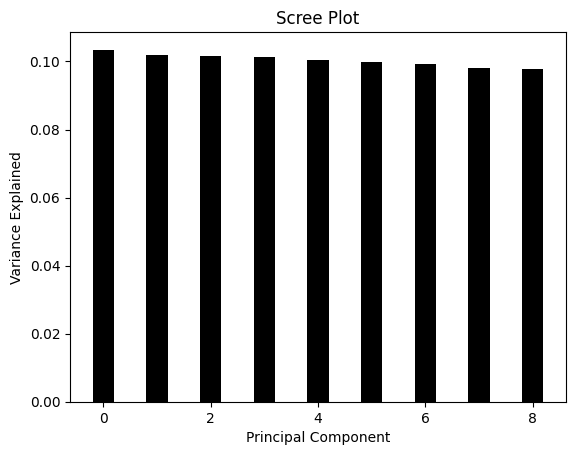

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dfPart = df.loc[:, df.columns != 'have_depression']
ArraySS = StandardScaler().fit_transform(dfPart) 

#****************************************
# Perform PCA
#n_components is the amount of components (features) (dimension) you want to keep 

# 9 features
pca = PCA(n_components = 9)
PCAData = pca.fit_transform(ArraySS)


#****************************************
# Explained Variance
print("\n")
print("PCA Explained Variance Chart")
print(pca.explained_variance_ratio_)
print("\n")

#****************************************
# Scree plot
# To display the explained variance of each feature
PC_values = np.arange(pca.n_components_)

plt.figure(1)
plt.bar(PC_values, pca.explained_variance_ratio_, width=0.4, color='black')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


The scree plot shows that each feature is roughly equally spread out with values. Thus, we can keep using all the features that originally came with the dataset.

Perform a Decision tree training testing model on the data to see how all of the features of a student (their GPA, their marital status, etc... to determine whether or not a student has depression

In [7]:
# Decision Tree classification

# Import necessary libraries for train/test split, classification, and results displaying
from sklearn import tree
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from IPython.core.pylabtools import figsize
from sklearn.metrics import accuracy_score

Text(0.5, 1.0, 'Decision Tree Max. Depth vs. Accuracy')

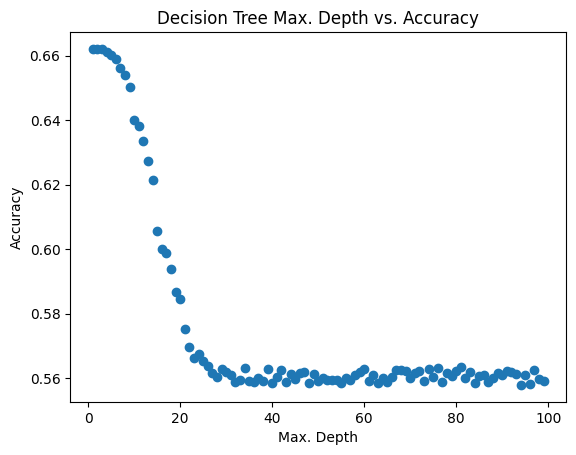

In [8]:

# Split data into train/test set with 70/30 split
TrainData, TestData = train_test_split(df, test_size=0.3, shuffle=True)

# Split the X and Y features
x_features = ['gender', 'age', 'gpa', 'class_status', 'marital_status', 'have_anxiety', 'have_panicattacks', 'seeked_treatment']

# # Populate the train and test data X and Y lists
TrainDataX = TrainData[x_features]
TrainDataY = TrainData['have_depression']

TestDataX = TestData[x_features]
TestDataY = TestData['have_depression']

acc_list = []
n_list = list(range(1,100))

for i in n_list:
    model = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=i)
    model.fit(TrainDataX, TrainDataY)

    # Now with the training data fitted, it is time to let the test data make its own predictions based on the results of the train data model fit
    PredictY = model.predict(TestDataX)
    acc = accuracy_score(TestDataY, PredictY) 
    acc_list.append(acc)



plt.scatter(n_list, acc_list)
plt.xlabel("Max. Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Max. Depth vs. Accuracy")


In [14]:

# Decision Tree Classification - train the classifier with the train data set
# Entropy measures the uncertainty or impurity, of a node
# The more entropy a node has, the more uncertain the outcome (Yes or No for example) is to be

# Decision Tree Classification - train the classifier with the train data set
model = tree.DecisionTreeClassifier(max_depth=180)
model.fit(TrainDataX, TrainDataY)


#***********************************
# Predict the response for test data set
PredictY = model.predict(TestDataX)

# Confusion matrix to differentiate between true positive and negative(TP TN), and false positive and negative (FP FN)
CM = confusion_matrix(TestDataY, PredictY)
print("Confusion Matrix...")
print(CM)

# Print classification report and confusion matrix 
CR = classification_report(TestDataY,PredictY, target_names=['Does not have depression', 'Has Depression'])
print("Clasification Report...")
print(CR)

# other models 
# Naive bayes 

Confusion Matrix...
[[3059 1472]
 [1582  731]]
Clasification Report...
                          precision    recall  f1-score   support

Does not have depression       0.66      0.68      0.67      4531
          Has Depression       0.33      0.32      0.32      2313

                accuracy                           0.55      6844
               macro avg       0.50      0.50      0.50      6844
            weighted avg       0.55      0.55      0.55      6844

